<a href="https://colab.research.google.com/github/Bernardo-Senna/DataScience_Cryptocurrency_Project/blob/main/notebooks/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICD - Projeto Final: Cryptocurrency
## Introdução
Neste trabalho vamos analisar informações históricas de preços de algumas das principais criptomoedas do mercado, por capitalização.

### Motivação
A motivação pelo trabalho veio de um interesse em comum entre os membros do grupo, à respeito da ascenção apresentada pelas Cripto Moedas. 
Para entender melhor as influências criadas por elas no mercado financeiro, e também os diversos impactos causados por elas, escolhemos uma base de dados que apresenta os dados históricos de 23 das principais cripto moedas existentes.

### Dados Utilizados
Para a realização deste projeto, foi necessário utilizar alguns conjuntos de dados de domínio público (Kaggle). Nesta seção iremos entrar em mais detalhes sobre as bases utilizadas.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import pandas as pd
import scipy as sci
import scipy.stats as st
import seaborn as sb
import statsmodels.api as sm
import os
import pandas
import sklearn

#o comando abaixo faz com que o Pandas identifique dados que tendem ao infinito (inf ou -inf), tratando-os como NaN
pandas.options.mode.use_inf_as_na = True
coinsDict = {}

In [2]:
coinsDict = {
    'aave':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Aave.csv"),
    'binanceCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_BinanceCoin.csv"),
    'bitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Bitcoin.csv"),
    'cardano':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cardano.csv"),
    'chainLink':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_ChainLink.csv"),
    'cosmos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cosmos.csv"),
    'cryptocomCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_CryptocomCoin.csv"),
    'dogecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Dogecoin.csv"),
    'eos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_EOS.csv"),
    'ethereum':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Ethereum.csv"),
    'lota':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Iota.csv"),
    'litecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Litecoin.csv"),
    'monero':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Monero.csv"),
    'nem':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_NEM.csv"),
    'polkadot':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Polkadot.csv"),
    'solana':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Solana.csv"),
    'stellar':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Stellar.csv"),
    'tether':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tether.csv"),
    'tron':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tron.csv"),
    'usdCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_USDCoin.csv"),
    'uniswap':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Uniswap.csv"),
    'wrappedBitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_WrappedBitcoin.csv"),
    'xrp':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_XRP.csv"),
}

In [3]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
        elif isinstance(data, pd.Series):
            converted = data.to_frame().T
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted


In [4]:
for coin in coinsDict:
  coinsDict[coin]['Year'] = coinsDict[coin]['Date'].map(lambda x: x[0:4])
  coinsDict[coin]['Month'] = coinsDict[coin]['Date'].map(lambda x: x[5:7])
  coinsDict[coin]['Day'] = coinsDict[coin]['Date'].map(lambda x: x[8:10])
  coinsDict[coin]['Difference'] = coinsDict[coin]['Close'] - coinsDict[coin]['Open']

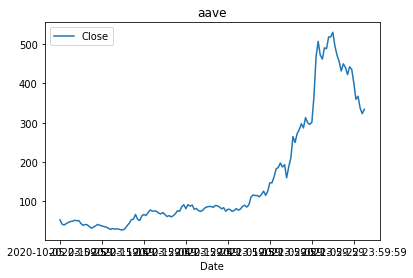

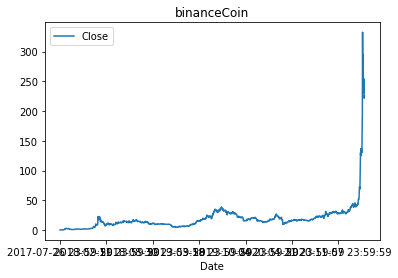

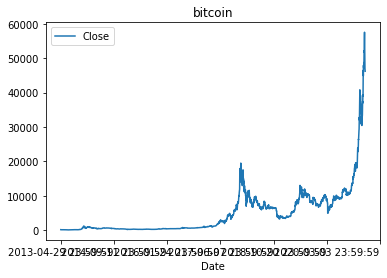

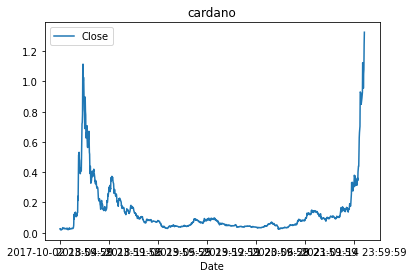

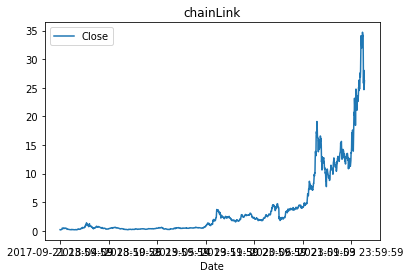

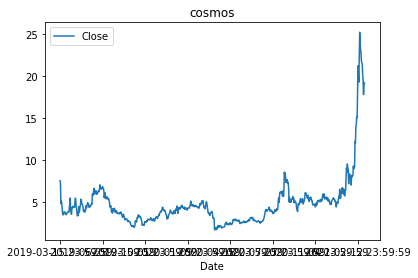

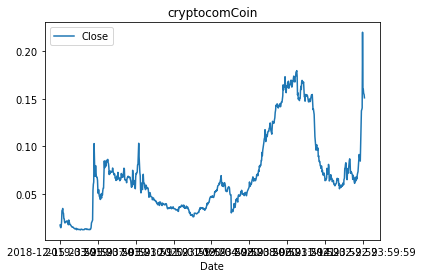

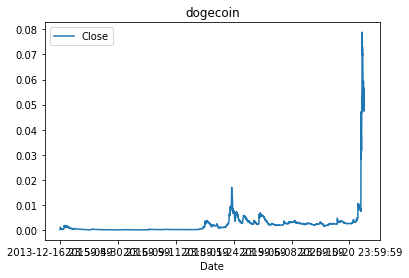

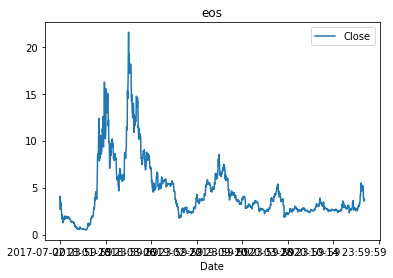

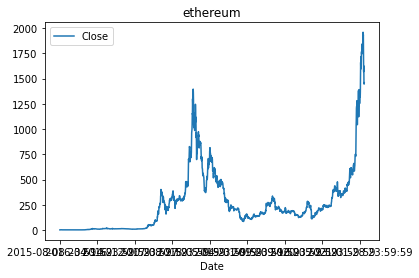

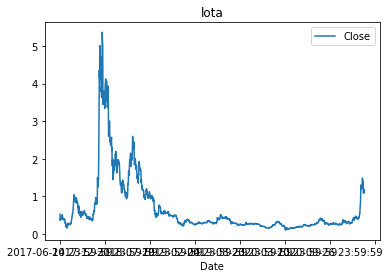

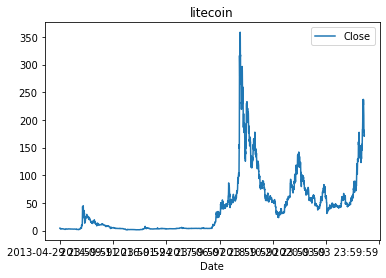

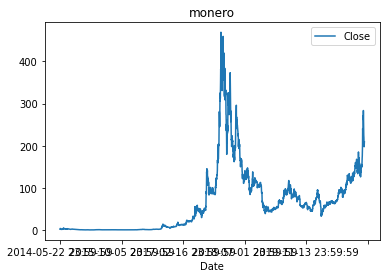

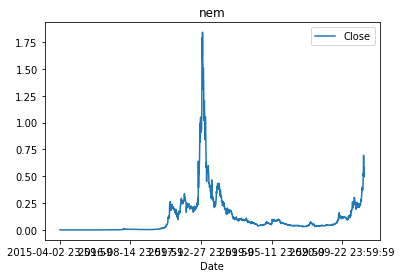

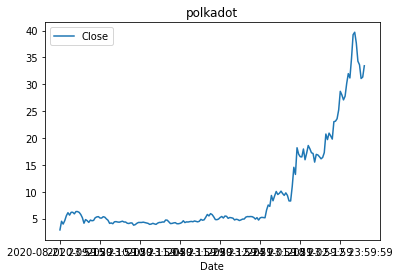

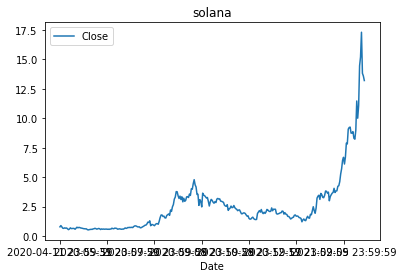

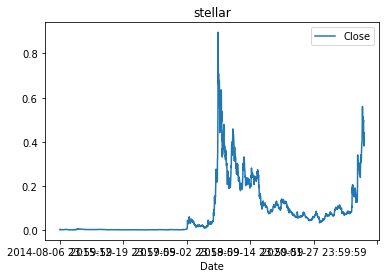

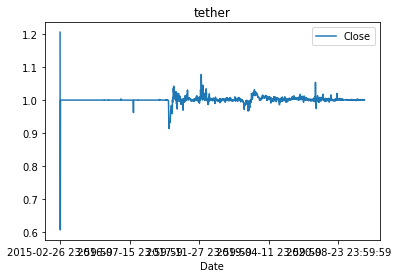

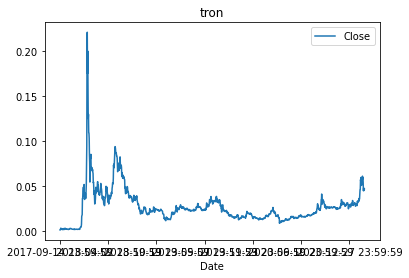

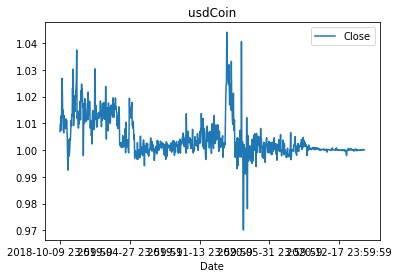

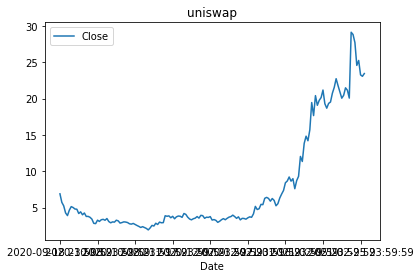

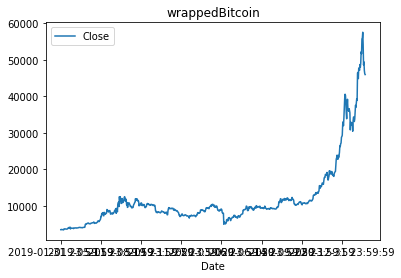

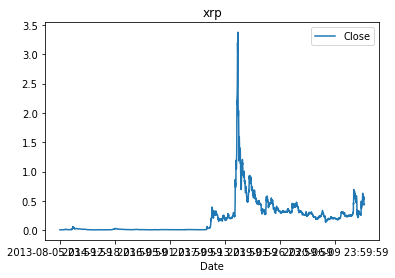

In [5]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin.plot("Date","Close", ax=ax)
  plt.title(name)
  plt.show()

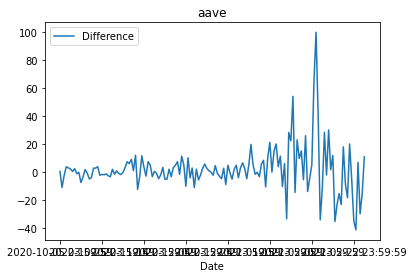

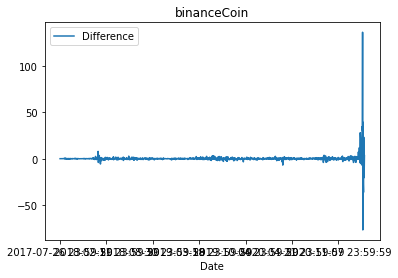

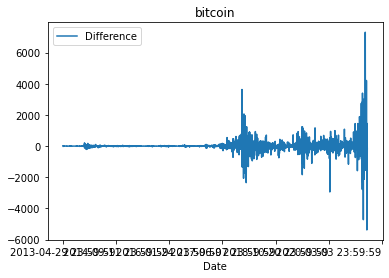

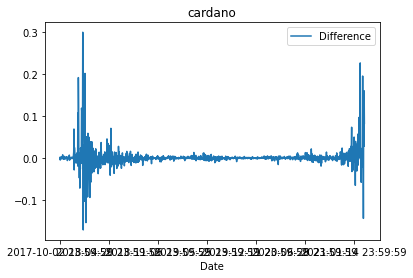

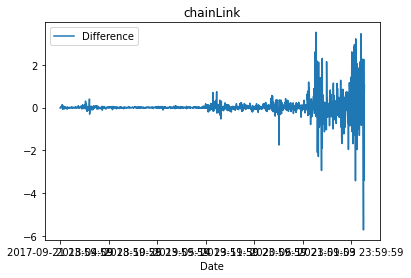

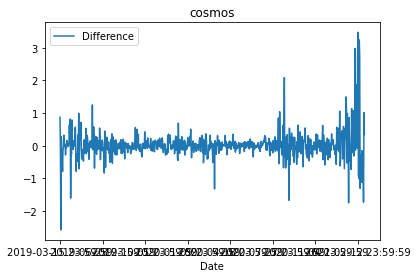

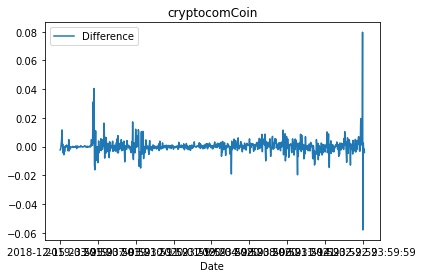

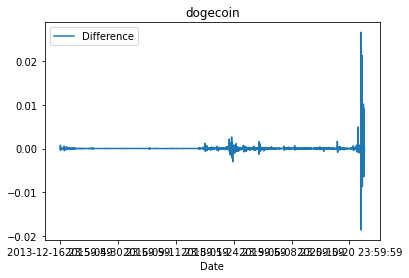

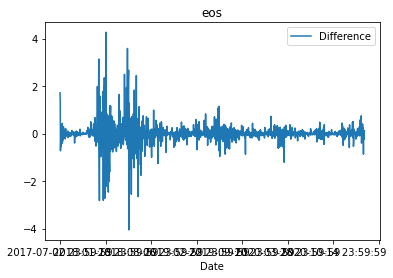

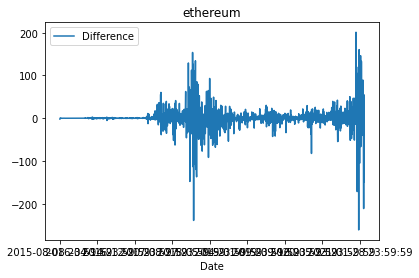

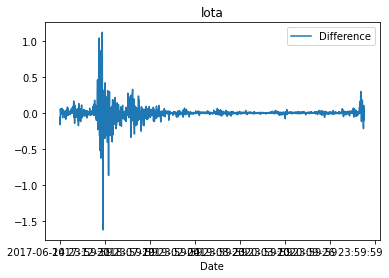

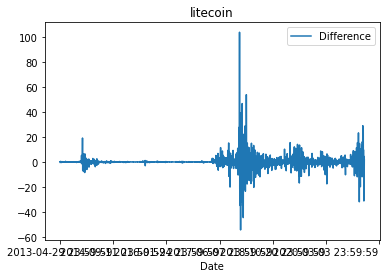

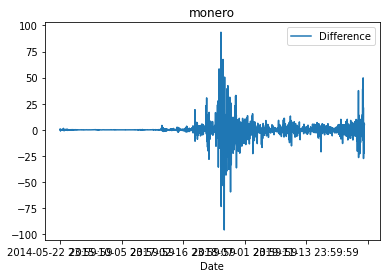

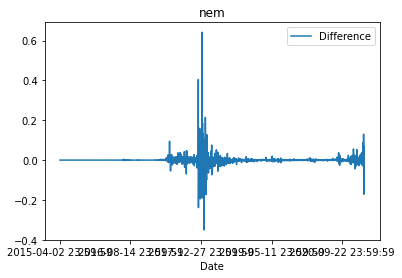

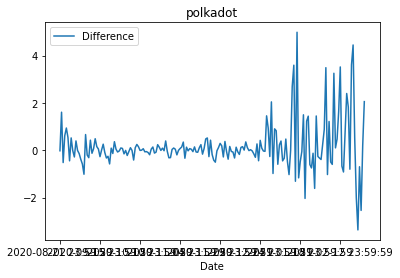

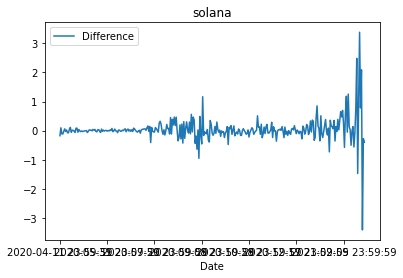

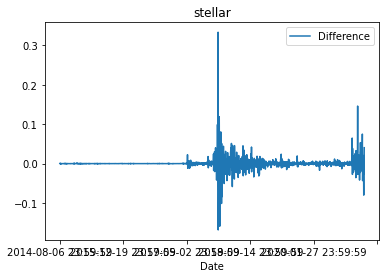

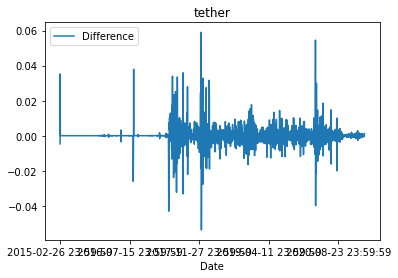

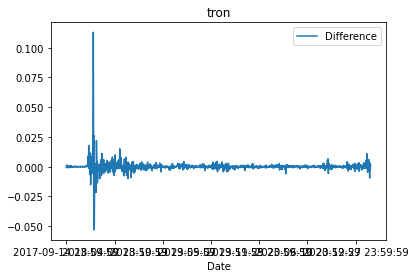

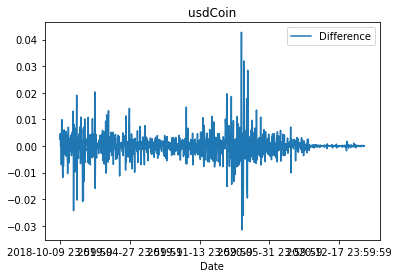

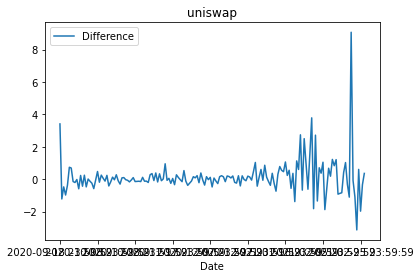

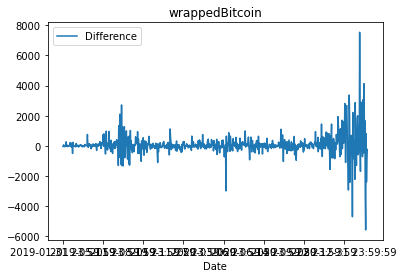

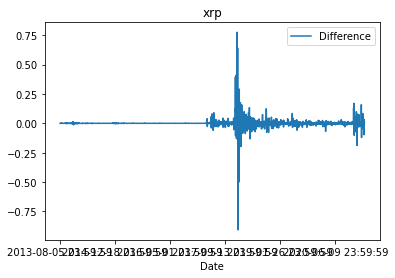

In [6]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin.plot("Date","Difference", ax=ax)
  plt.title(name)
  plt.show()

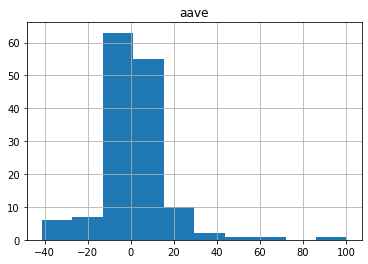

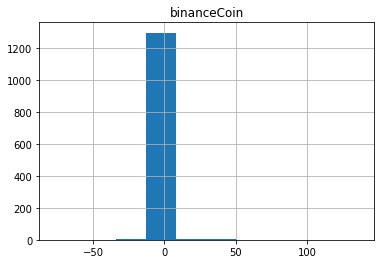

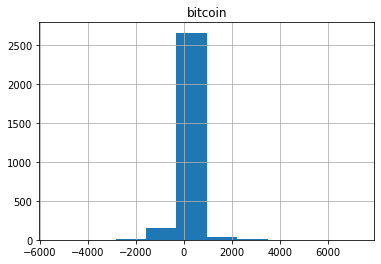

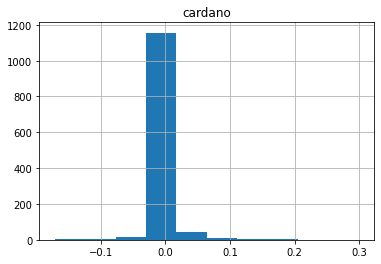

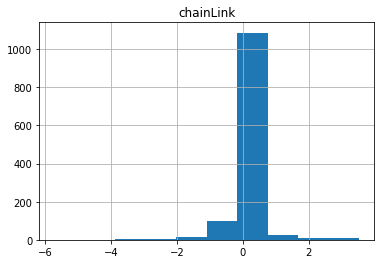

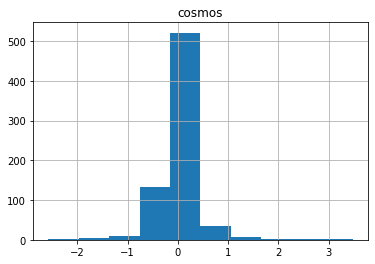

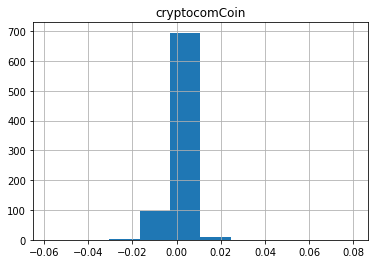

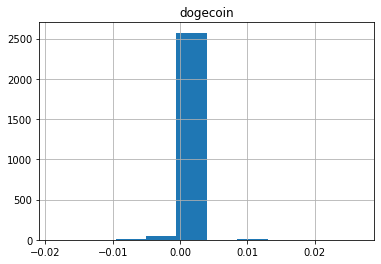

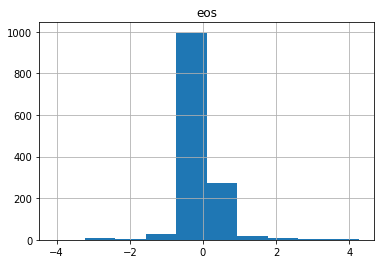

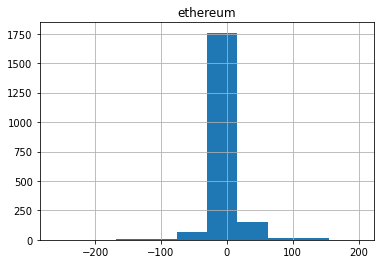

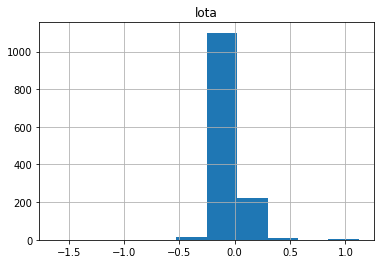

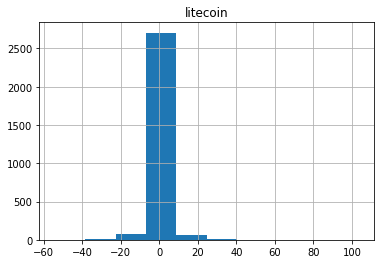

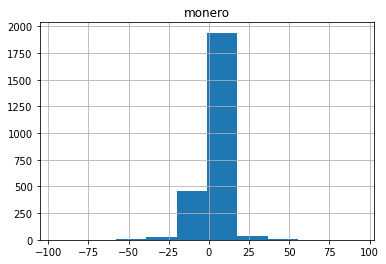

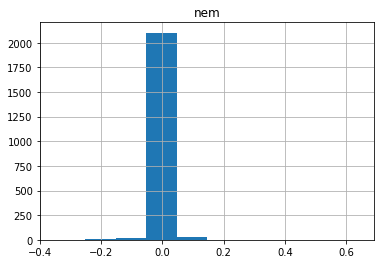

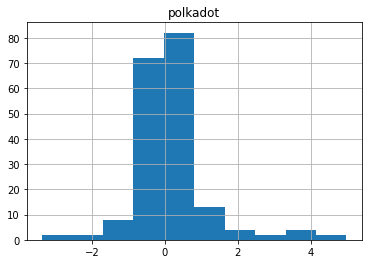

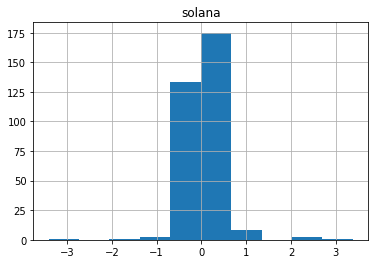

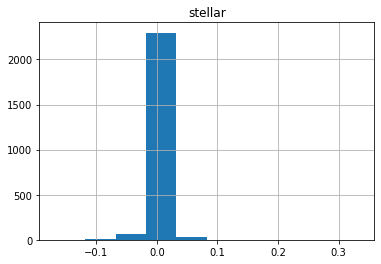

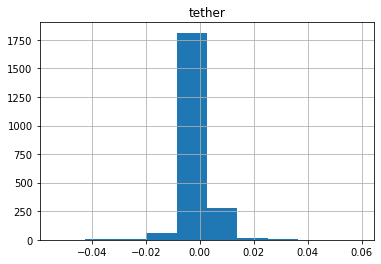

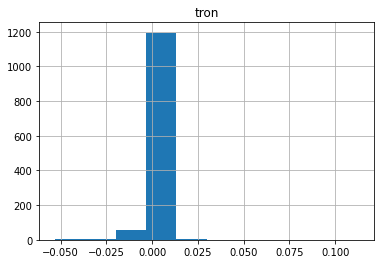

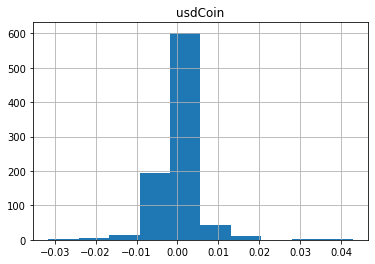

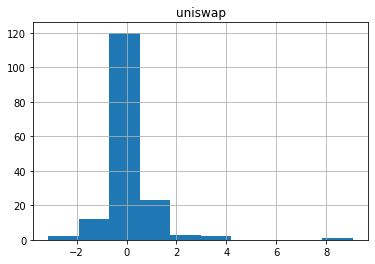

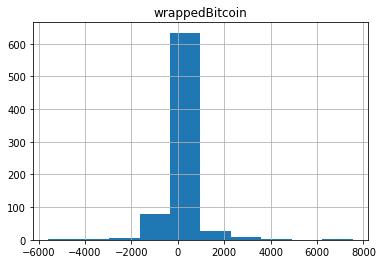

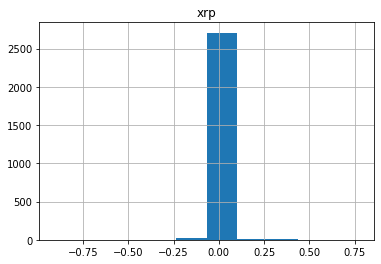

In [7]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin.hist("Difference", ax=ax)
  plt.title(name)
  plt.show()

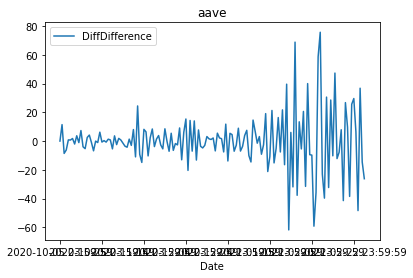

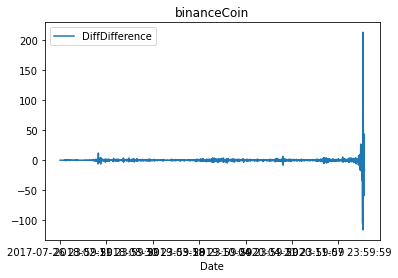

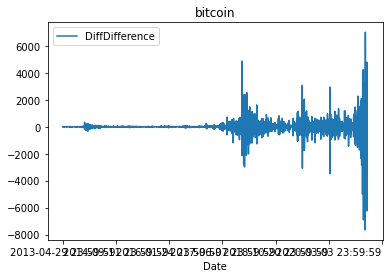

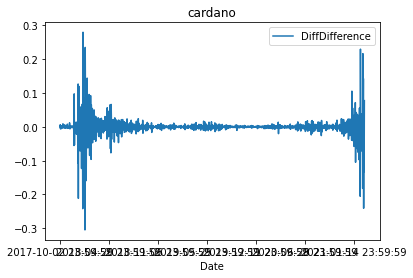

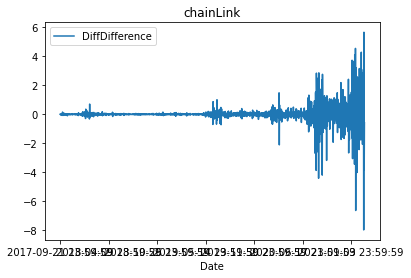

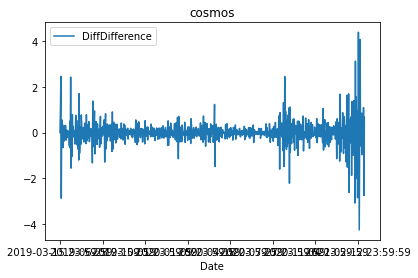

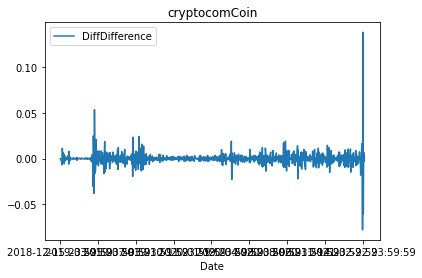

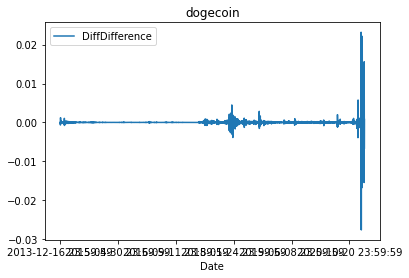

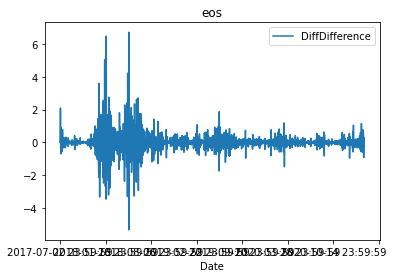

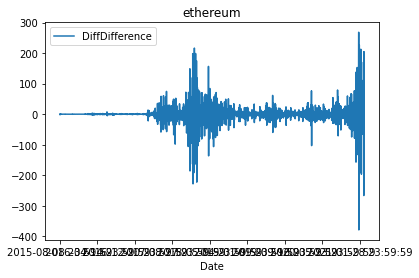

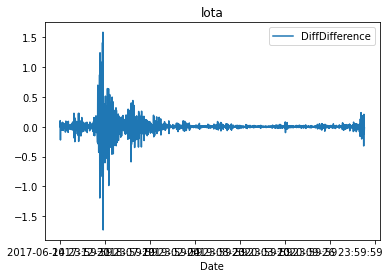

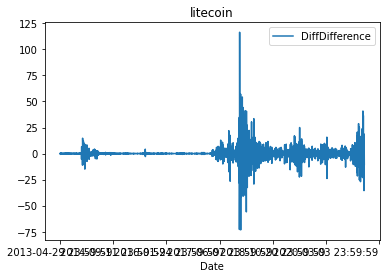

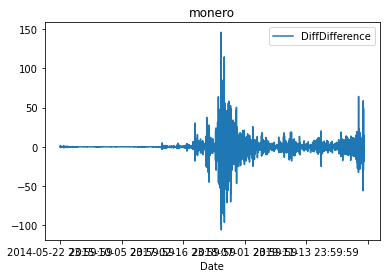

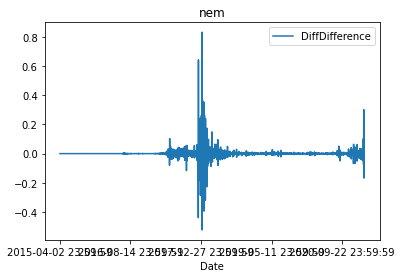

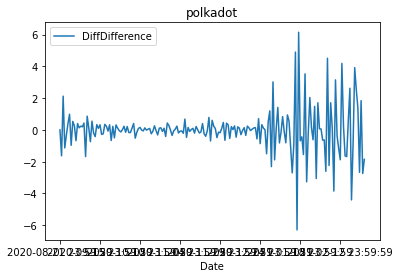

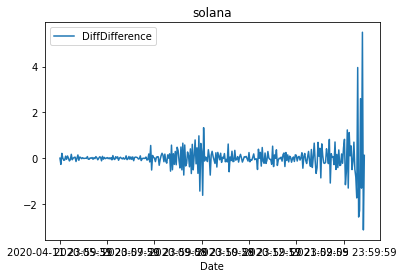

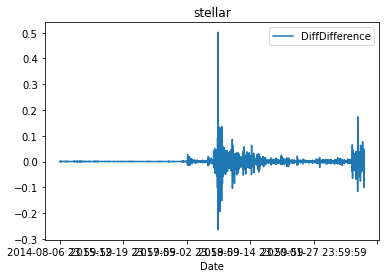

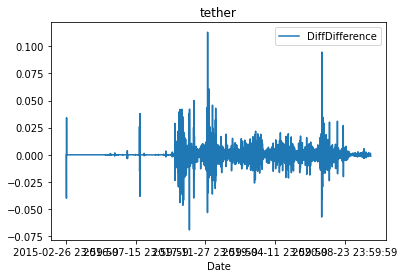

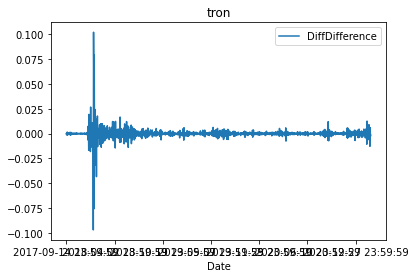

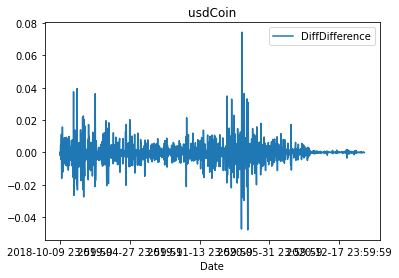

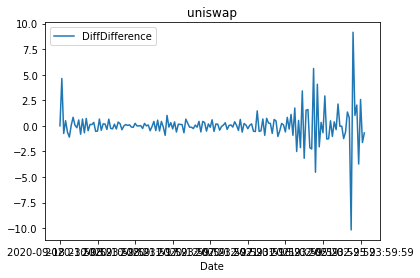

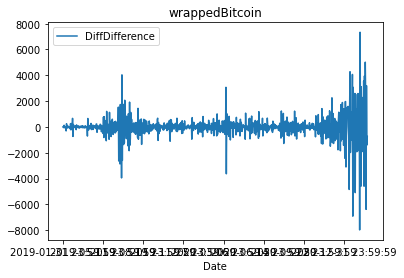

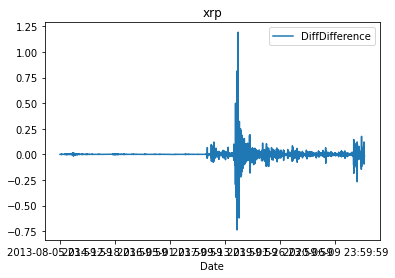

In [8]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin["DiffDifference"] = np.concatenate((np.zeros(1), coin["Difference"].iloc[:-1].values - coin["Difference"].iloc[1:].values))
  coin.plot("Date","DiffDifference", ax=ax)
  plt.title(name)
  
  plt.show()

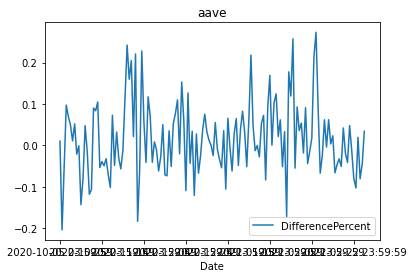

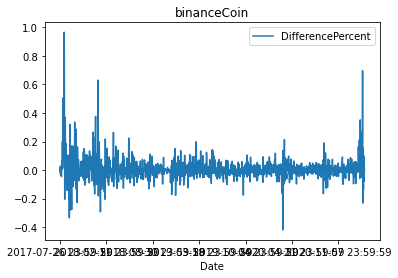

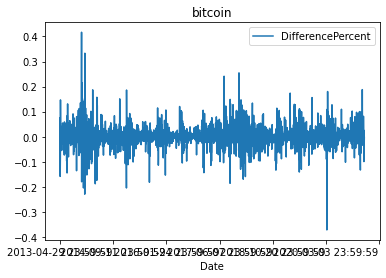

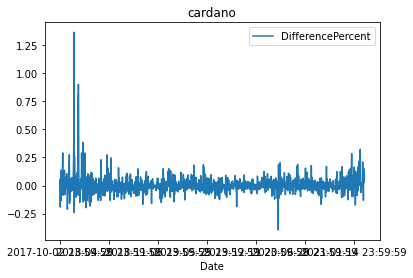

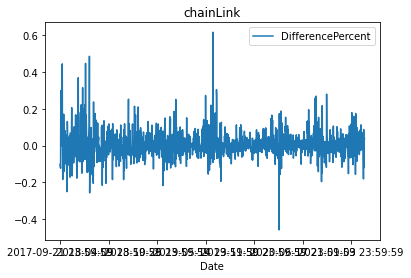

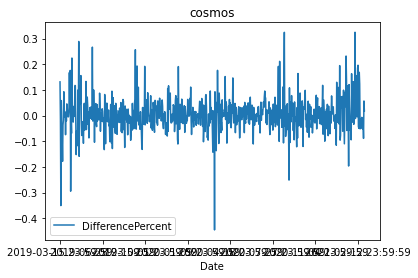

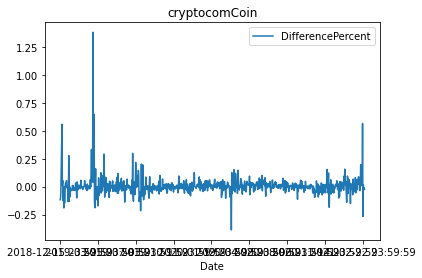

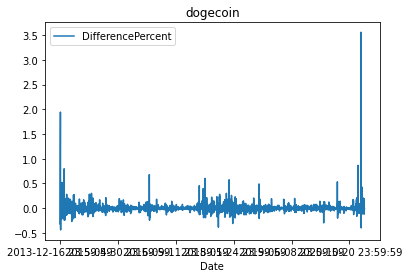

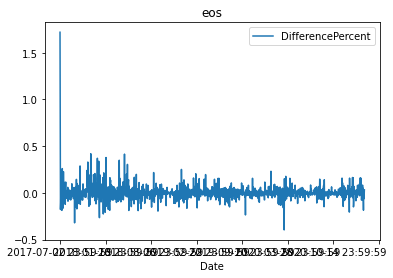

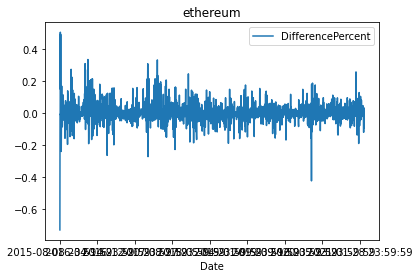

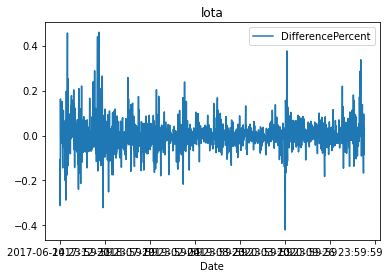

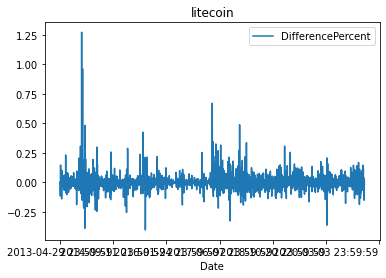

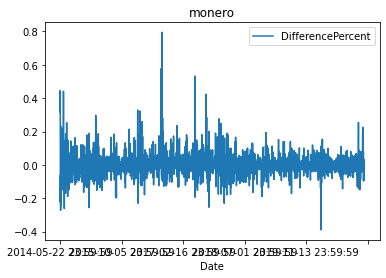

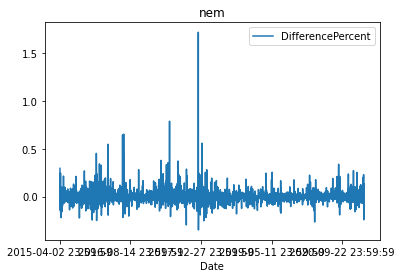

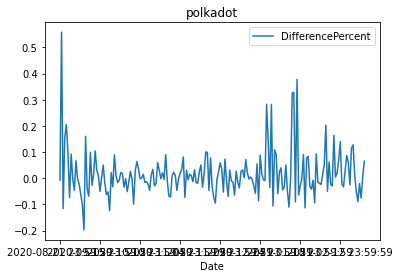

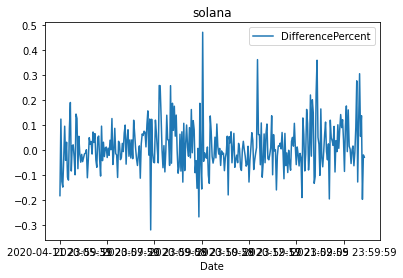

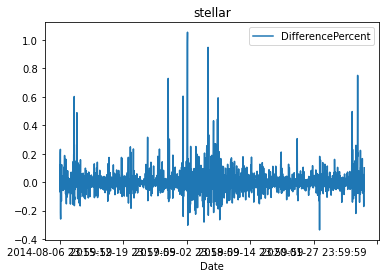

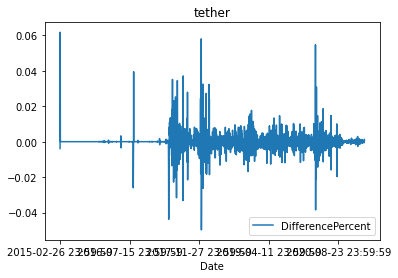

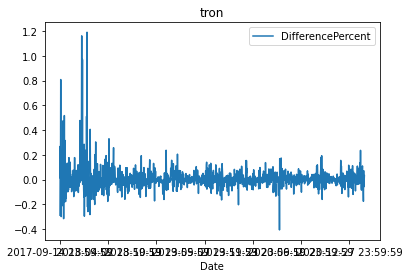

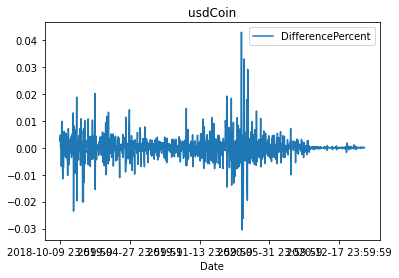

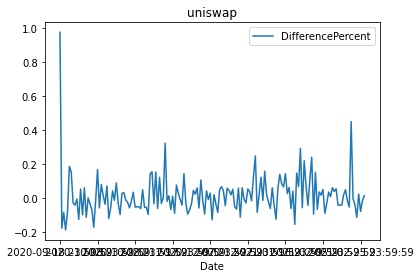

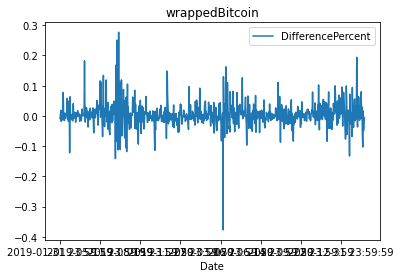

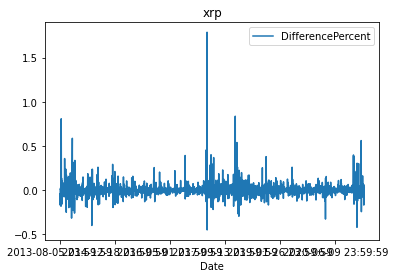

In [9]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin["DifferencePercent"] = coin["Difference"] / coin["Open"]
  coin.plot("Date","DifferencePercent", ax=ax)
  plt.title(name)
  
  plt.show()

In [10]:
from statsmodels import tsa

In [11]:
result = tsa.api.kpss(coinsDict["bitcoin"]["DiffDifference"])
print(result[1])

0.1


/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


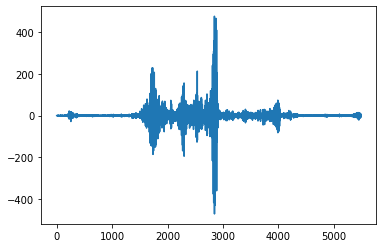

In [12]:
plt.plot(sci.signal.correlate(coinsDict["bitcoin"]["DiffDifference"], coinsDict["dogecoin"]["DiffDifference"]))

$X_i = X_{i-1} + \delta_i$; $\delta_i = \delta_{i-1} + \Delta_i$

In [13]:
coinsDict['bitcoin']['Difference'].var()

167320.4952262333

In [14]:
#variancia da variação

coinsDict['bitcoin']['Difference'].std()

409.0482798230953

In [15]:
coinsDict['bitcoin'].head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Difference,DiffDifference,DifferencePercent
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,04,29,10.095993,0.000000,0.075094
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,04,30,-5.000000,15.095993,-0.034722
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,05,01,-22.010002,17.010002,-0.158345
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,05,02,-11.169998,-10.840004,-0.095979
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,05,03,-8.500000,-2.669998,-0.080000


# Previsão de valores
Nesta sessão iremos explorar, durante um periodo de tempo especifico, a possibilidade de previsão de valores de criptomoedas dados os valores de outras criptomoedas.

Inicialmente podemos observar no heatmap da matriz de correlações que existem correlações altas entre alguns pares de CMs.

<AxesSubplot:>

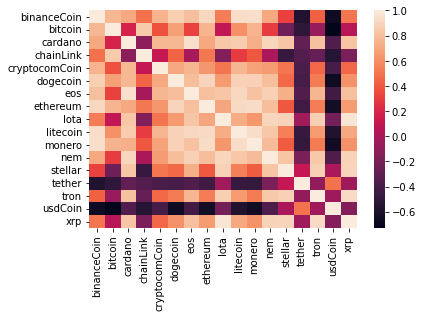

In [16]:
dates = coinsDict["bitcoin"][coinsDict["bitcoin"]["Year"] == "2019"]["Date"]
closes = {name: coin[coin["Date"].isin(dates)]["Close"].to_numpy() for name, coin in coinsDict.items()}
closes = {name:coin for name,coin in closes.items() if len(coin) == 365}
closes = pd.DataFrame(closes)
# pd.plotting.scatter_matrix(closes, figsize=(16,16))
sb.heatmap(closes.corr())


O mesmo não pode ser dito das correlações das diferenças.

<AxesSubplot:>

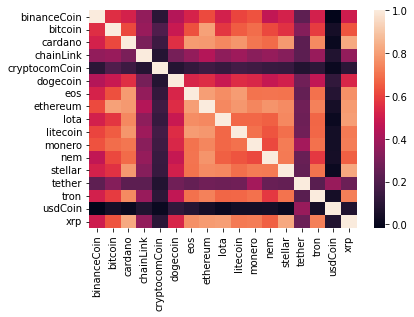

In [17]:
dates = coinsDict["bitcoin"][coinsDict["bitcoin"]["Year"] == "2019"]["Date"]
var = {name: coin[coin["Date"].isin(dates)]["Difference"].to_numpy() for name, coin in coinsDict.items()}
var = {name:coin for name,coin in var.items() if len(coin) == 365}
var = pd.DataFrame(var)
sb.heatmap(var.corr())


Em seguida, tentamos prever o valor atual de uma moeda dado o valor das outras moedas

In [18]:
import scipy.stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
columns = list(closes.columns)
data = []
for coin in columns:
    cols = columns.copy()
    cols.remove(coin)
    df = closes[cols].copy()
    y = closes[coin]
    df = sm.add_constant(df)
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /= 5
    
    est = sm.OLS(closes[coin], df)
    est = est.fit()
    data += [(coin, est.rsquared, est.mse_total, err, y.mean())]
pd.DataFrame(data, columns=["coin", "R²", "MSE", "CV MSE", "Mean(y)"])

/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/minicon

,coin,R²,MSE,CV MSE,Mean(y)
0,binanceCoin,0.969274,6.927977e+01,1.287230e+01,20.092979
1,bitcoin,0.979702,6.962395e+06,5.957193e+05,7395.246281
2,cardano,0.972919,3.421702e-04,9.141280e-05,0.055499
3,chainLink,0.938322,8.836554e-01,4.128434e-01,1.536396
4,cryptocomCoin,0.808844,4.622954e-04,8.269393e-04,0.044579
5,dogecoin,0.914836,1.989740e-07,8.866599e-08,0.002563
6,eos,0.970325,1.974309e+00,2.790314e-01,4.020991
7,ethereum,0.983129,2.538413e+03,1.887110e+02,181.770138
8,lota,0.968561,4.921056e-03,6.484878e-04,0.297822
9,litecoin,0.970231,7.575521e+02,1.191365e+02,69.667119


Um resultado muito positivo, exceto para o caso da usdCoin, que tem um comportamento anômalo. Nota-se que o MSE tem uma escala proxima da média de y.

Porem, pode ser mais interessante/lucrativo prever a variação de uma moeda dadas as outras moedas. Isso é testado a seguir

In [19]:
columns = list(var.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = var[cols].copy()
    df = sm.add_constant(df)
    y = var[col]
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /= 5
    
    
    est = sm.OLS(var[col], df)
    est = est.fit()
    data += [(col, est.rsquared, err)]
pd.DataFrame(data, columns=["coin", "R²", "CV MSE"])

/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/minicon

,coin,R²,CV MSE
0,binanceCoin,0.494996,4.749186e-01
1,bitcoin,0.705175,4.924821e+04
2,cardano,0.805500,2.511932e-06
3,chainLink,0.245738,1.238771e-02
4,cryptocomCoin,0.060083,2.004298e-05
5,dogecoin,0.390877,7.912865e-09
6,eos,0.780173,1.553758e-02
7,ethereum,0.866935,1.584902e+01
8,lota,0.721452,6.892198e-05
9,litecoin,0.746718,4.071438e+00


O resultado não é tão positivo quanto o anterior, mas algumas moedas ainda apresentam R² relativamente alto e MSE baixo.

Porém, pode fazer mais sentido tentar prever se a moeda vai ter crescimento ou decrescimento de valor naquele dia, independente do valor do crescimento. Isso é explorado a seguir.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
columns = list(var.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = var[cols].copy()
    df = (df - df.mean(0))/df.std(0)
    df = sm.add_constant(df)
    y = var[col].values
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
    err /= 5
    
    est = sm.OLS(var[col], df)
    est = est.fit()
    data += [(col, est.rsquared, err)]
pd.DataFrame(data, columns=["coin", "R²", "CV ROCAUC"])

/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/minicon

,coin,R²,CV ROCAUC
0,binanceCoin,0.494996,0.723381
1,bitcoin,0.705175,0.788605
2,cardano,0.805500,0.839996
3,chainLink,0.245738,0.638424
4,cryptocomCoin,0.060083,0.523127
5,dogecoin,0.390877,0.742044
6,eos,0.780173,0.825866
7,ethereum,0.866935,0.872381
8,lota,0.721452,0.751423
9,litecoin,0.746718,0.822482


Para algumas moedas, como a stellar, temos um preditor razoável de variação dada umas variação. Porém, talvez seja mais relevante prever o valor com antecedência, usando por exemplo os valores das moedas no dia anterior.

In [21]:
columns = list(var.columns)
data = []
for col in columns:
    cols = columns.copy()
    df = var[cols].copy()
    df = (df - df.mean(0))/df.std(0)
    df = sm.add_constant(df)
    df = df.iloc[:-1]
    y = var[col].values[1:]
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    baseline_err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
        
        baseline_pred = (df[col].values[test_idx]> 0).astype(int)
        baseline_err += roc_auc_score(y[test_idx], baseline_pred)
    err /= 5
    baseline_err /= 5
    y = var[col].iloc[1:]
    y.index = df.index
    est = sm.OLS(y, df)
    est = est.fit()
    data += [(col, est.rsquared, err, baseline_err)]
pd.DataFrame(data, columns=["coin", "R²", "CV ROCAUC", "Baseline"])

/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/castro/minicon

,coin,R²,CV ROCAUC,Baseline
0,binanceCoin,0.052365,0.516547,0.463152
1,bitcoin,0.113326,0.495162,0.446371
2,cardano,0.104958,0.563147,0.448922
3,chainLink,0.071038,0.545701,0.451364
4,cryptocomCoin,0.029046,0.476690,0.455780
5,dogecoin,0.116397,0.455798,0.483706
6,eos,0.105032,0.487870,0.399518
7,ethereum,0.119191,0.512395,0.428016
8,lota,0.113452,0.547520,0.441101
9,litecoin,0.113425,0.515941,0.455908


Lamentavelmente uma regressão logistica utilizando $X_{t-1}$ tem resultado pouco melhor que o acaso para a maioria das CMs. Porém é melhor que o baseline de repetir o sinal do ultimo valor.

/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


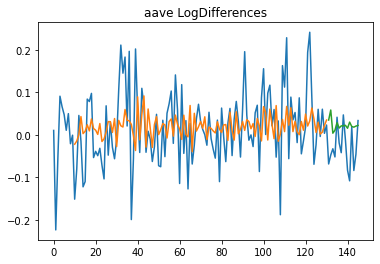

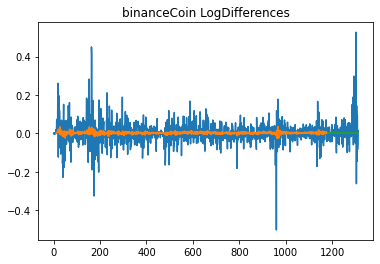

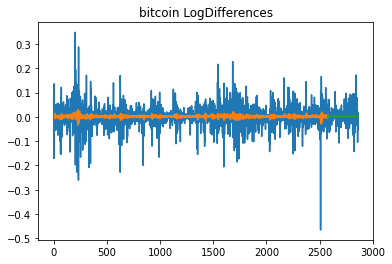

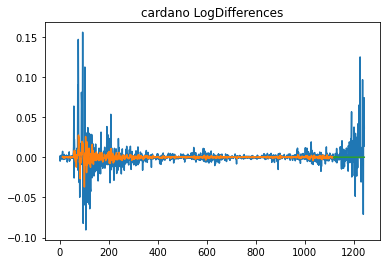

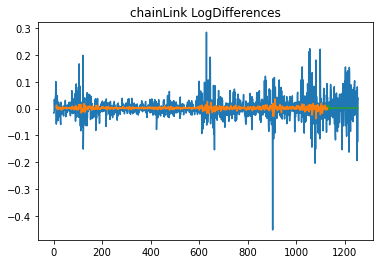

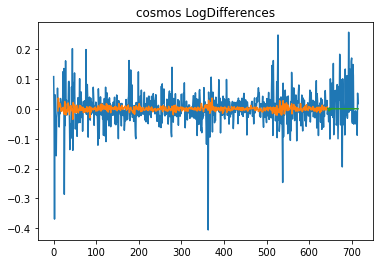

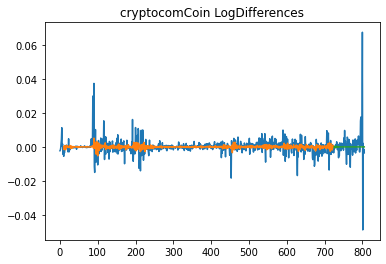

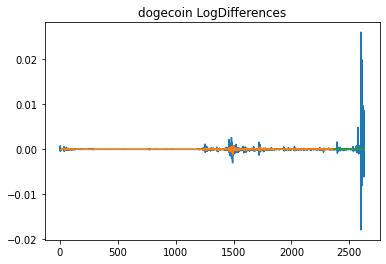

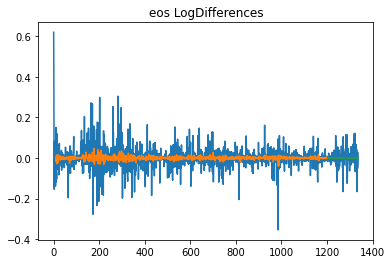

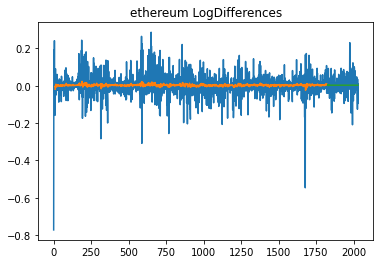

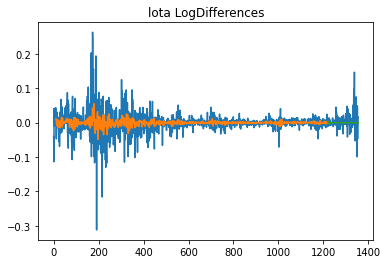

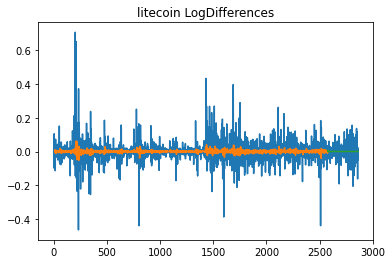

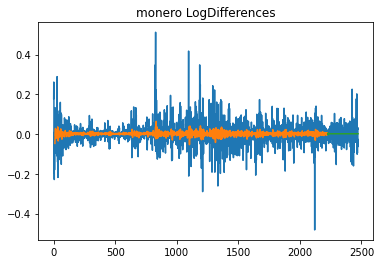

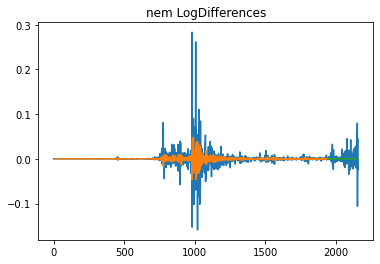

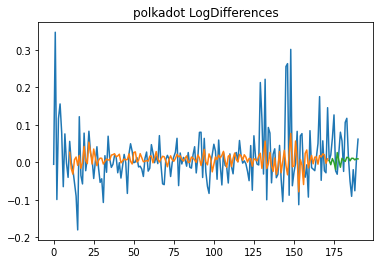

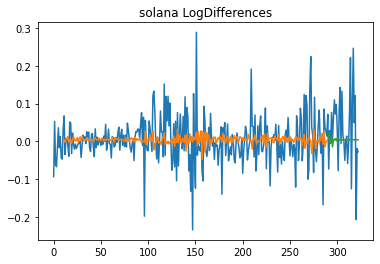

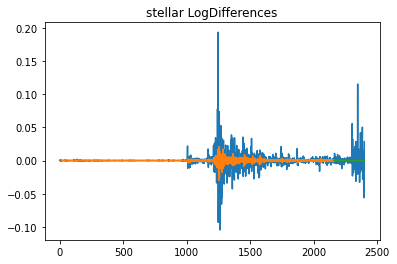

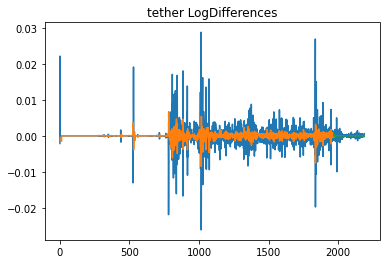

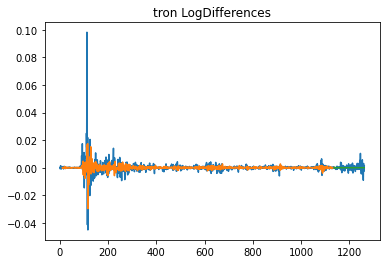

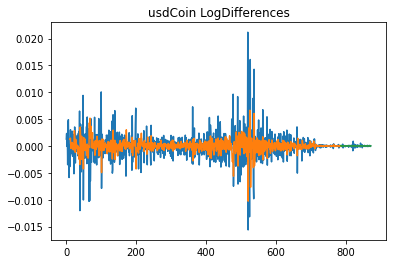

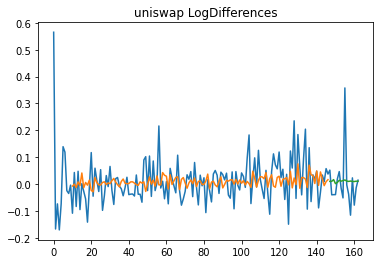

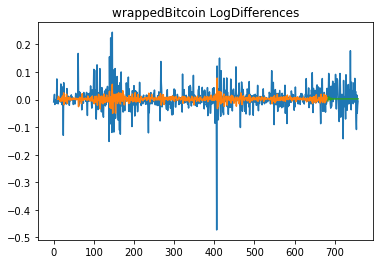

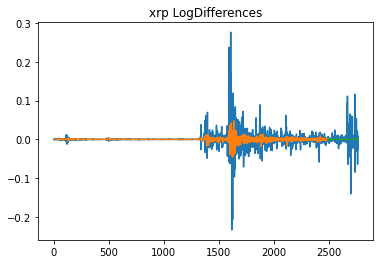

,CM,ACC,Immediate Pred
0,aave,0.266667,False
1,binanceCoin,0.564885,False
2,bitcoin,0.580420,True
3,cardano,0.584000,False
4,chainLink,0.523810,False
5,cosmos,0.458333,False
6,cryptocomCoin,0.530864,False
7,dogecoin,0.505703,False
8,eos,0.470149,False
9,ethereum,0.581281,False


In [22]:
from statsmodels.tsa.ar_model import AutoReg

def split(df):
    size = len(df)
    return df.iloc[:round(size*0.9)], df.iloc[round(size*0.9):]

data = []
for coin in coinsDict.keys():
    df = coinsDict[coin]
    df["LogDiff"] = np.log1p(df["Close"]) - np.log1p(df["Open"])
    
    train, test = split(df[["LogDiff"]])
    model = AutoReg(train, lags=10)
    res = model.fit()
    plt.figure()
    plt.title(f"{coin} LogDifferences")
    plt.plot(df["LogDiff"])
    plt.plot(res.fittedvalues)
    plt.plot(res.forecast(steps=len(test)))
    predictions = res.forecast(steps=len(test)).values
    plt.show()
    correct = (predictions > 0) == (test.values[:, 0] > 0)
    acc = correct.mean()
    first_correct = correct[0]
    data += [(coin, acc, first_correct)]

pd.DataFrame(data, columns=["CM", "ACC", "Immediate Pred"])


Vemos aqui que para alguma moedas, uma simples autorregressão pode prever com 60% de acerto as subidas e descidadas de algumas CMs.

In [23]:
# coinsDict["bitcoin"].hist("Difference", bins=100)
import seaborn as sns
import scipy.stats
for name in coinsDict.keys():
  _, pvalue = scipy.stats.shapiro(coinsDict[name]["Close"] - coinsDict[name]["Open"])
  print(name, pvalue)
  print(len(coinsDict[name]))

aave 2.8870599487473836e-12
146
binanceCoin 0.0
1313
bitcoin 0.0
2862
cardano 0.0
1245
chainLink 0.0
1256
cosmos 3.809324919563555e-32
716
cryptocomCoin 4.3815169798199434e-39
806
dogecoin 0.0
2631
eos 7.006492321624085e-45
1337
ethereum 0.0
2031
lota 0.0
1355
litecoin 0.0
2862
monero 0.0
2473
nem 0.0
2159
polkadot 2.2752954559915285e-15
191
solana 4.1498480897874246e-26
323
stellar 0.0
2398
tether 0.0
2189
tron 0.0
1263
usdCoin 1.3215647018950145e-29
873
uniswap 1.4985791275245562e-17
163
wrappedBitcoin 8.976434743229557e-36
759
xrp 0.0
2764


In [24]:
subdf = coinsDict['bitcoin'][['Difference', 'Year', 'Month']].groupby(['Year', 'Month']).sum()

In [25]:
subdf
# plt.hist(subdf['Difference'])

Difference
Year Month              
2013 04         5.095993
     05        -9.280022
     06       -32.839806
     07         6.224312
     08        26.770012
...                  ...
2020 10      2965.791415
     11      5869.076567
     12      9380.478105
2021 01      3369.342107
     02     13147.526109

[95 rows x 1 columns]

In [26]:
#dados Z-normalizdos por dia
Zcoindict = coinsDict.copy()

for coin in Zcoindict:
    Zcoindict[coin]['High'] = (Zcoindict[coin]['High'] - Zcoindict[coin]['High'].mean())/Zcoindict[coin]['High'].std()
    Zcoindict[coin]['Low'] = (Zcoindict[coin]['Low'] - Zcoindict[coin]['Low'].mean())/Zcoindict[coin]['Low'].std()
    Zcoindict[coin]['Open'] = (Zcoindict[coin]['Open'] - Zcoindict[coin]['Open'].mean())/Zcoindict[coin]['Open'].std()
    Zcoindict[coin]['Close'] = (Zcoindict[coin]['Close'] - Zcoindict[coin]['Close'].mean())/ Zcoindict[coin]['Close'].std()
    # Zcoindict[coin]['Variation'] = (Zcoindict[coin]['Variation'] - Zcoindict[coin]['Variation'].mean())/Zcoindict[coin]['Variation'].std()

Zcoindict['bitcoin'].tail()



,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Difference,DiffDifference,DifferencePercent,LogDiff
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,6.848241,6.088838,7.120228,6.304182,1.061025e+11,9.099259e+11,2021,02,23,-5380.502887,2055.083088,-0.099262,-0.104539
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,6.442780,6.377251,6.345758,6.430475,6.369552e+10,9.263931e+11,2021,02,24,870.245655,-6250.748542,0.017820,0.017663
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,6.534427,6.359306,6.471811,6.056074,5.450657e+10,8.777661e+11,2021,02,25,-2615.229406,3485.475061,-0.052611,-0.054044
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,6.036685,5.963486,6.107119,5.947962,3.509679e+11,8.637523e+11,2021,02,26,-840.703971,-1774.525435,-0.017819,-0.017979
2861,2862,Bitcoin,BTC,2021-02-27 23:59:59,6.020338,6.085604,5.986591,5.926270,4.591095e+10,8.609781e+11,2021,02,27,-156.320962,-684.383009,-0.003373,-0.003379


In [27]:
#A data de criação da moeda diz algo a respeito do seu Marketcap atual ?

from datetime import datetime

df_allCoins = pd.DataFrame()

for coins in coinsDict:
  df_aux = convert(coinsDict[coins].iloc[[0, -1]], 'dataframe')
  df_allCoins = pd.concat([df_allCoins, df_aux], ignore_index=True)

df_coin_per_existence_time = pd.DataFrame(columns=['Name', 'Existence_time (days)', 'Last_Marketcap'])

for coinName in np.unique(df_allCoins["Name"]):
  init_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[0]
  init_time = datetime.fromisoformat(init_time)

  end_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[1]
  end_time = datetime.fromisoformat(end_time)

  existence_time = (pd.Timedelta(end_time - init_time).days)

  last_mktcap = df_allCoins[df_allCoins["Name"] == coinName]["Marketcap"].iloc[1]

  series_aux = pd.Series([coinName, existence_time, last_mktcap], index=df_coin_per_existence_time.columns)
  df_coin_per_existence_time = pd.concat([df_coin_per_existence_time, convert(series_aux, 'dataframe')], ignore_index=True)

df_coin_per_existence_time = df_coin_per_existence_time.sort_values(by=['Existence_time (days)', 'Last_Marketcap']).reset_index()
df_coin_per_existence_time


,index,Name,Existence_time (days),Last_Marketcap
0,0,Aave,145,4151558855.57
1,20,Uniswap,162,7310011683.65
2,14,Polkadot,190,30567858010.02
3,15,Solana,322,3457387613.23
4,5,Cosmos,715,4045796647.14
5,21,Wrapped Bitcoin,758,5672220785.53
6,6,Crypto.com Coin,805,3651007758.82
7,19,USD Coin,872,8658975905.809999
8,3,Cardano,1244,41219695427.290001
9,4,Chainlink,1255,10756640654.5


In [28]:
df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).corr()

,Existence_time (days),Last_Marketcap
Existence_time (days),1.000000,0.352797
Last_Marketcap,0.352797,1.000000


In [29]:
x, y = df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).values.T
x = sm.add_constant(x)
res = sm.OLS(y, x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.985
Date:                Thu, 26 Aug 2021   Prob (F-statistic):             0.0987
Time:                        15:48:44   Log-Likelihood:                -626.52
No. Observations:                  23   AIC:                             1257.
Df Residuals:                      21   BIC:                             1259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.601e+10   6.89e+10     -0.667      0.512   -1.89e+11    9.73e+10
x1          6.871e+07   3.98e+07      1.728      0.099    -1.4e+07    1.51e+08
==============================================================================
Omnibus:                       45.930   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.741
Skew:                           3.452   Prob(JB):                     3.13e-43
Kurtosis:                      15.514   Cond. No.                     3.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""